In [ ]:
# ✅ 1. Instalar Ultralytics (YOLOv8)
!pip install ultralytics

# ✅ 3. Descomprimir el archivo ZIP
!unzip -q "/content/x.zip" -d data

# ✅ 4. Verifica estructura del dataset
import os
for root, dirs, files in os.walk("data"):
    print(root)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
from PIL import Image

classes = ["Monster", "Spell", "Trap"]

def convert_annotation_line_safe(line, img_width, img_height):
    try:
        parts = line.strip().split()
        if len(parts) != 2:
            return None, None
        filename, bbox = parts
        x_min, y_min, x_max, y_max, class_id = map(int, bbox.split(","))

        x_center = ((x_min + x_max) / 2) / img_width
        y_center = ((y_min + y_max) / 2) / img_height
        width = (x_max - x_min) / img_width
        height = (y_max - y_min) / img_height

        return f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}", filename
    except Exception:
        return None, None

base_dir = "data"

for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(base_dir, split)
    label_output_dir = os.path.join(img_dir, 'labels')
    os.makedirs(label_output_dir, exist_ok=True)

    txt_files = [f for f in os.listdir(img_dir) if f.endswith('.txt')]
    for txt_file in txt_files:
        with open(os.path.join(img_dir, txt_file), "r") as f:
            lines = f.readlines()

        for line in lines:
            img_name = line.split()[0]
            img_path = os.path.join(img_dir, img_name)
            if not os.path.exists(img_path):
                continue
            with Image.open(img_path) as im:
                width, height = im.size

            yolo_line, filename = convert_annotation_line_safe(line, width, height)
            if yolo_line:
                label_file = os.path.join(label_output_dir, os.path.splitext(filename)[0] + '.txt')
                with open(label_file, 'a') as out:
                    out.write(yolo_line + '\n')


In [ ]:
import os
import shutil

# Mover imágenes a /images para cada partición
for split in ['train', 'valid', 'test']:
    base_path = f"/content/data/{split}"
    image_path = os.path.join(base_path, 'images')
    os.makedirs(image_path, exist_ok=True)

    for file in os.listdir(base_path):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            shutil.move(os.path.join(base_path, file), os.path.join(image_path, file))


In [ ]:
yaml_content = """
train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images

nc: 3
names: ['Monster', 'Spell', 'Trap']
"""

with open('/content/data/data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
# ✅ 5. Entrenar el modelo con YOLOv8m (modelo medio)
from ultralytics import YOLO

# Cargar el modelo preentrenado más robusto que "nano"
model = YOLO("yolov8m.pt")  # Puedes cambiar a yolov8l.pt si quieres más potencia

# Entrenamiento (100 épocas, 640x640)
results = model.train(data="/content/data/data.yaml", epochs=10, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:01<00:00, 50.8MB/s]


Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

100%|██████████| 755k/755k [00:00<00:00, 149MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3777433  ultralytics.nn.modules.head.Detect           [3, [192, 384, 576]]          
Model summary: 169 layers, 25,858,057 parameters, 25,858,041 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 336MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1624.7±745.2 MB/s, size: 59.0 KB)


train: Scanning /content/data/train/labels... 243 images, 0 backgrounds, 0 corrupt: 100%|██████████| 243/243 [00:00<00:00, 2377.42it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 737.2±653.2 MB/s, size: 64.2 KB)


val: Scanning /content/data/valid/labels... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<00:00, 1260.52it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.12G      1.568      6.073      2.217          3        640: 100%|██████████| 16/16 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all         69         69      0.308      0.777      0.451      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.32G     0.2748      2.101      1.134          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         69         69      0.648      0.651       0.52      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.38G     0.2792      1.262      1.089          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         69         69      0.123      0.696      0.178     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.45G     0.3204     0.9149      1.147          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         69         69      0.429      0.392      0.321      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       6.4G      0.349     0.8777       1.16          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         69         69     0.0811       0.67     0.0593      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.37G     0.2809     0.7608      1.119          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         69         69      0.607      0.622      0.683      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.29G     0.2421     0.6038       1.05          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         69         69     0.0932      0.596     0.0727     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.29G     0.1994     0.5126      1.027          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         69         69      0.955      0.899      0.935      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.29G     0.1787     0.4847      1.035          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         69         69      0.979      0.981      0.988      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.29G     0.1753     0.4739      1.018          3        640: 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         69         69      0.982      0.984      0.992      0.948



10 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         69         69      0.982      0.984      0.992       0.95
               Monster         21         21          1      0.952      0.989       0.94
                 Spell         26         26      0.954          1      0.994      0.952
                  Trap         22         22      0.992          1      0.995      0.959
Speed: 0.2ms preprocess, 9.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# ✅ 6. Evaluar el modelo
metrics = model.val()
print(metrics)

Ultralytics 8.3.112 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 844.4±345.7 MB/s, size: 51.7 KB)


val: Scanning /content/data/valid/labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all         69         69      0.982      0.984      0.992      0.946
               Monster         21         21          1      0.952      0.989       0.94
                 Spell         26         26      0.954          1      0.994      0.947
                  Trap         22         22      0.992          1      0.995       0.95
Speed: 11.4ms preprocess, 24.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7835acd388d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012, 

In [ ]:
import glob

# Buscar automáticamente el archivo best.pt más reciente
model_path = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]
print("Modelo encontrado en:", model_path)

# Cargar el modelo
model = YOLO(model_path)


Modelo encontrado en: runs/detect/train/weights/best.pt


Saving 51N+rN0-zeL._AC_UF894,1000_QL80_.jpg to 51N+rN0-zeL._AC_UF894,1000_QL80_.jpg

image 1/1 /content/51N+rN0-zeL._AC_UF894,1000_QL80_.jpg: 640x448 1 Trap, 27.6ms
Speed: 3.9ms preprocess, 27.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


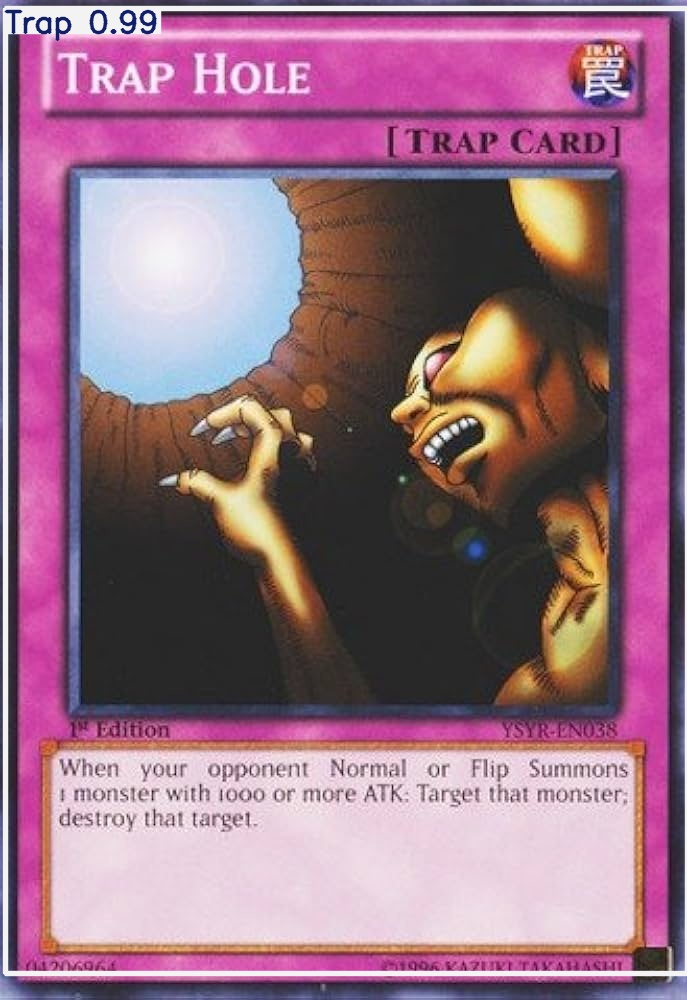

In [ ]:
# Subir la imagen para probar
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Hacer la predicción
results = model.predict(source=img_path, save=True, conf=0.25)

# Mostrar resultado
from IPython.display import Image, display
import os

predict_folder = "runs/detect/predict"
result_img = os.listdir(predict_folder)[0]
display(Image(filename=os.path.join(predict_folder, result_img)))


Saving 41cicxC2DbL._AC_UF894,1000_QL80_.jpg to 41cicxC2DbL._AC_UF894,1000_QL80_.jpg

image 1/1 /content/41cicxC2DbL._AC_UF894,1000_QL80_.jpg: 640x448 1 Trap, 29.7ms
Speed: 3.7ms preprocess, 29.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


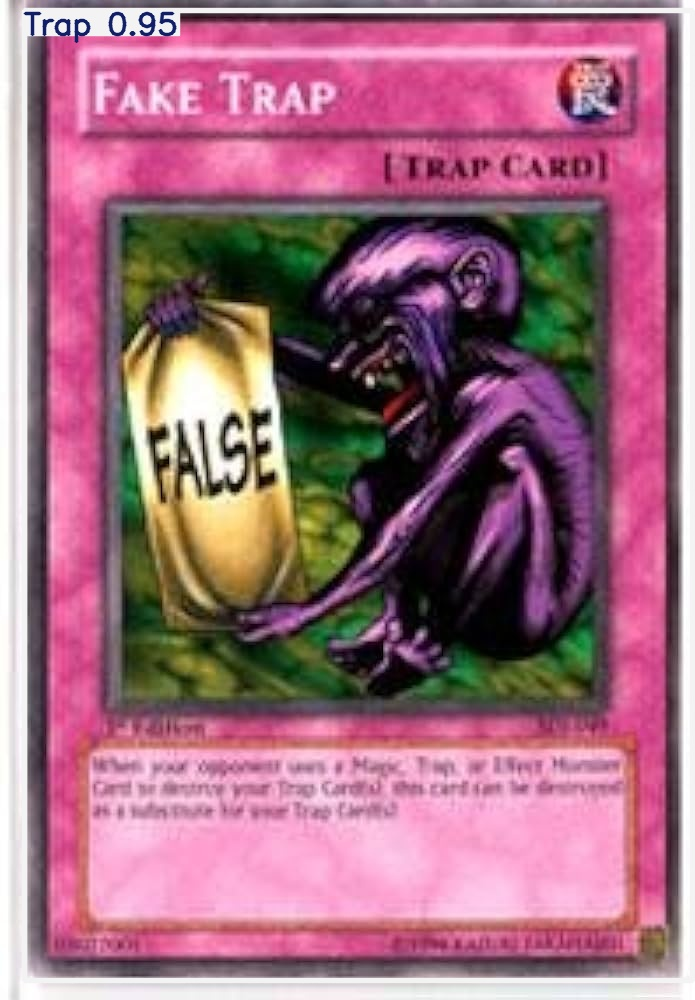

In [ ]:
from ultralytics import YOLO
import os, shutil
from IPython.display import Image, display
from google.colab import files
import glob

# 1. Buscar automáticamente el modelo
model_path = sorted(glob.glob("runs/detect/train*/weights/best.pt"))[-1]
model = YOLO(model_path)

# 2. Subir nueva imagen
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 3. Borrar carpeta anterior de predicciones
if os.path.exists("runs/detect/predict"):
    shutil.rmtree("runs/detect/predict")

# 4. Hacer predicción
results = model.predict(source=img_path, save=True, conf=0.25)

# 5. Mostrar imagen resultante
result_img = os.listdir("runs/detect/predict")[0]
display(Image(filename=os.path.join("runs/detect/predict", result_img)))